# A graphical example

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import utils

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

### Loading the dataset

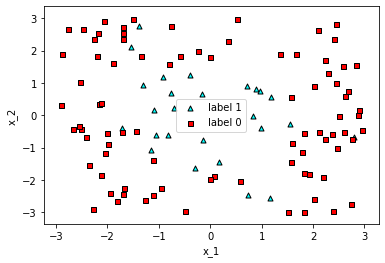

In [42]:
# Loading the one_circle dataset

df = pd.read_csv('one_circle.csv', index_col=0)
x = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)
utils.plot_points(x,y)

In [43]:
df

,x_1,x_2,y
0,-0.759416,2.753240,0
1,-1.885278,1.629527,0
2,2.463302,-1.023869,0
3,-1.986004,-0.898810,0
4,2.010834,-2.580117,0
...,...,...,...
105,-1.376637,2.778703,1
106,-0.703722,0.215382,1
107,0.729767,-2.479655,1
108,-1.715920,-0.393404,1


In [44]:
x[:10]

array([[-0.759416  ,  2.7532401 ],
       [-1.8852779 ,  1.62952654],
       [ 2.46330243, -1.02386888],
       [-1.98600415, -0.89880979],
       [ 2.01083403, -2.58011745],
       [ 2.41018752,  2.37050087],
       [ 1.59914005, -0.86273162],
       [-1.10985644, -2.46969746],
       [ 2.4473419 ,  2.81117994],
       [-1.69773161,  2.53984757]])

In [45]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Preprocessing the data

In [46]:
# Categorizing the output

from tensorflow.keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### Building and compiling the neural network

In [47]:
# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               384       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


### Training the neural network

In [48]:
# Training the model
model.fit(x, categorized_y, epochs=100, batch_size=10)

Epoch 1/100
11/11 [==============================] - 0s 1ms/step - loss: 0.5473 - accuracy: 0.7182
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7636
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7636
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.7636
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7636
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7636
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7636
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.7636
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7636
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.7636
Epoch 11/

11/11 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9091
Epoch 83/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.9091
Epoch 84/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9182
Epoch 85/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9273
Epoch 86/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2648 - accuracy: 0.9000
Epoch 87/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9091
Epoch 88/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.9091
Epoch 89/100
11/11 [==============================] - 0s 14ms/step - loss: 0.2565 - accuracy: 0.9091
Epoch 90/100
11/11 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9000
Epoch 91/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.8818
Epoch 92/100

### Plotting the results

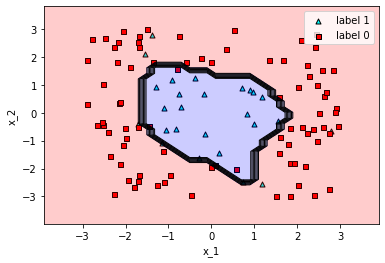

In [49]:
utils.plot_model(x, y, model)